In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
path = '/content/drive/MyDrive/movierec'

In [34]:
links = pd.read_csv(path + '/links.csv')
movies = pd.read_csv(path + '/movies.csv')
ratings = pd.read_csv(path + '/ratings.csv')
tags = pd.read_csv(path + '/tags.csv')

In [35]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [59]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [37]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [38]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [39]:
movie_ratings = pd.merge(ratings, movies, on='movieId')


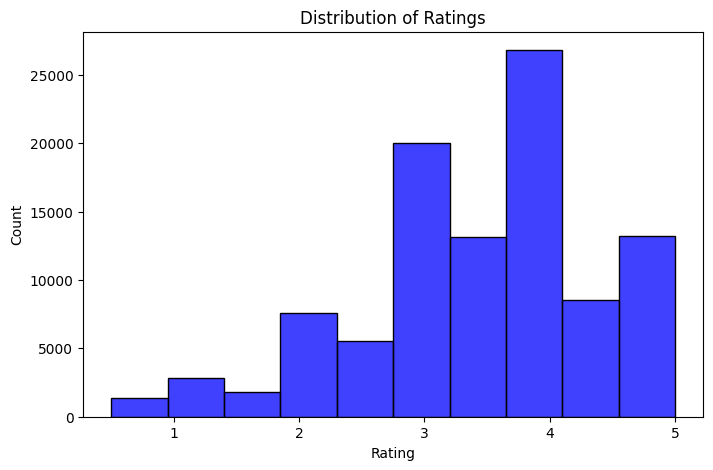

In [40]:
# Plot the distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(movie_ratings['rating'], bins=10, kde=False, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


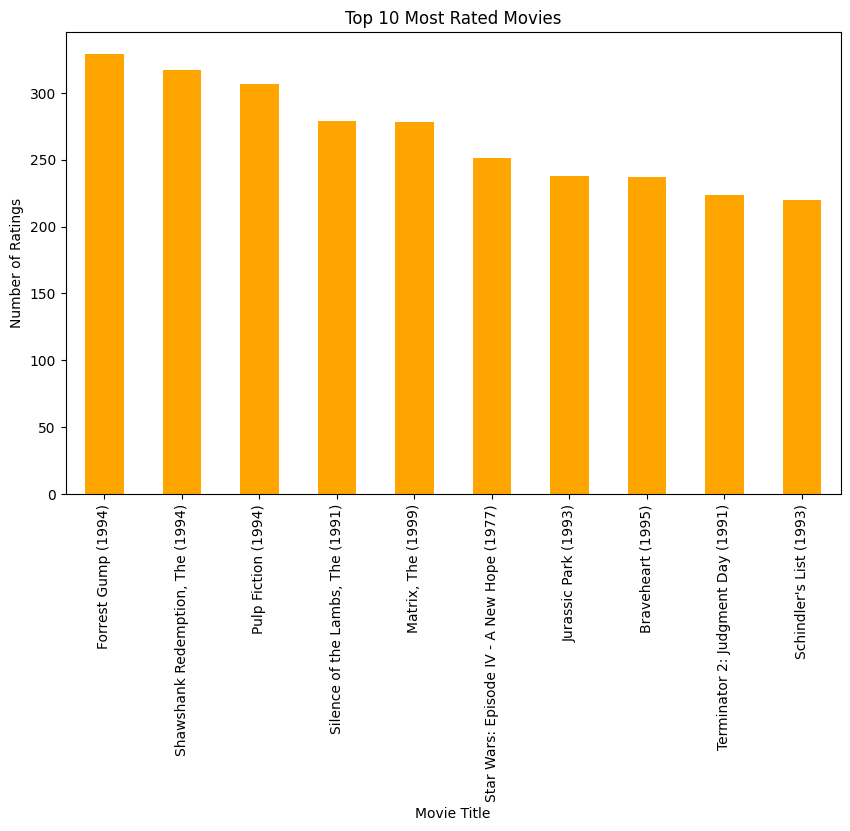

In [41]:
# Top 10 most-rated movies
top_rated = movie_ratings.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

# Plot top-rated movies
plt.figure(figsize=(10,6))
top_rated.plot(kind='bar', color='orange')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()


In [42]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [43]:
movie_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [44]:
movie_ratings['timestamp'] = pd.to_datetime(movie_ratings['timestamp'], unit='s')


In [45]:
movie_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


Collaborative filtering groups users based on their behavior and uses those groups to make recommendations. It assumes that users with similar behaviors have similar tastes and interests

In [46]:
# Create user-item matrix
user_item_matrix = movie_ratings.pivot_table(index='userId', columns='title', values='rating')

# Fill missing values with 0
user_item_matrix.fillna(0, inplace=True)

user_item_matrix


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0


In [47]:
pip install surprise


In [48]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy


In [49]:
# Load data into Surprise's format
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(movie_ratings[['userId', 'movieId', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2)


In [50]:
# Train SVD model
model = SVD()
model.fit(trainset)


In [51]:
# Predict and evaluate
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")


RMSE: 0.8627
RMSE: 0.8626518302173605


In [56]:
# Recommend top movies for a specific user using collaborative filtering
def get_top_n_recommendations(predictions, user_id, n=10):
    user_predictions = [pred for pred in predictions if pred.uid == user_id]
    user_predictions.sort(key=lambda x: x.est, reverse=True)
    return [(pred.iid, pred.est) for pred in user_predictions[:n]]

# Get recommendations for userId 1
user_recommendations = get_top_n_recommendations(predictions, user_id=3, n=10)
print("Top 10 Recommendations:", user_recommendations)


Top 10 Recommendations: [(914, 3.4752937902665466), (720, 2.8847808990778585), (1263, 2.748373176935007), (5181, 2.550897564061388), (1302, 2.5448778996290784), (5919, 2.4063862382203647), (6835, 2.4063862382203647), (2105, 2.2707560282932673), (4518, 2.1938852209048982)]


In [53]:
def get_top_n_recommendations_with_names(predictions, user_id, n=10, movies_df=None):
    # Filter predictions for the specified user
    user_predictions = [pred for pred in predictions if pred.uid == user_id]
    # Sort predictions by estimated rating in descending order
    user_predictions.sort(key=lambda x: x.est, reverse=True)
    # Select the top N recommendations
    top_n = user_predictions[:n]
    # Map movie IDs to names using the movies DataFrame
    recommendations = [(movies_df[movies_df['movieId'] == int(pred.iid)]['title'].values[0], pred.est) for pred in top_n]
    return recommendations


In [57]:
# Call the function with movie names
user_recommendations = get_top_n_recommendations_with_names(
    predictions,
    user_id=3,
    n=10,
    movies_df=movies
)

# Print recommendations
print("Top 10 Recommendations:")
for movie, rating in user_recommendations:
    print(f"{movie}: {rating:.2f}")


Top 10 Recommendations:
My Fair Lady (1964): 3.48
Wallace & Gromit: The Best of Aardman Animation (1996): 2.88
Deer Hunter, The (1978): 2.75
Hangar 18 (1980): 2.55
Field of Dreams (1989): 2.54
Android (1982): 2.41
Alien Contamination (1980): 2.41
Tron (1982): 2.27
The Lair of the White Worm (1988): 2.19


In [55]:
ratings['userId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18